In this project I will analize dataset from https://www.kaggle.com/lava18/google-play-store-apps. The purpose of it is to understand what kind of apps have biggest popularity. Research will help startups, investors, app developers to know probable expectations of number of users if they are going to create, invest in some app whic will be put in Google Playstore. Startups will be able to rise money if theyprovide meningful explanation to investors what is the future of app and investors will invest in apps which have postiential to grow, which are in tendencey in the market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculationfrom sklearn import metrics
from sklearn import metrics


%matplotlib inline

Let's investigate the dataframe to understand what we have and how to treat it. It will also help us understand whether we are going to make corections in somecells or not, what columns we are going to use etc. I will also analize data in each column, to understand wich columns do I need for my model.

In [2]:
df =pd.read_csv('googleplaystore.csv')
print(('My Dataframe consists of {} rows and {} columns').format(df.shape[0], df.shape[1]))
df.head(2)

My Dataframe consists of 10841 rows and 13 columns


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


From datafrmae I see that generally column `App`, `Genres` include information which is summarized in column `Category`

In [3]:
print('Unique values in App column - ', df['App'].nunique())
print('Unique values in Genres column - ', df['Genres'].nunique())
print('Unique values in Category column - ', df['Category'].nunique())

Unique values in App column -  9660
Unique values in Genres column -  120
Unique values in Category column -  34


In [4]:
df['App'].unique()[:5]

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
       'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book'],
      dtype=object)

In [5]:
df['Genres'].unique()[:5]

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles'], dtype=object)

In [6]:
df['Category'].unique()[:5]

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS'], dtype=object)

As I see from abovementioned unique values from certain column `App` is name of ceratin app. `Genres` are too wide version of `Category` column. So will not take `APP` but will take two others

`Rating` column is too subjective, becouse if at some point app started to work badly, it's rating can drop. I'm more interested which kind of app have poplarity in the market, so I'm more interested in downloads. The same is with `Reviews`, `Content Rating`, `Current Version` and `Last Update`. These are data which are not telling anything connected with the popularity of an app. Becouse for example, one app can be updated 10 time becouse of bad quality (all the time some bugs are corrected) and another one is working quit good and no need of update is needed. Also these anr not kind of features that we can imput initially.

In [7]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

As I see column `Type` is just tell whether certain app for frr is for paid. I have that information also in column `Price`. So will take column `Price` instead

In [8]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Think `Android Ver` can play role, becouse if app is for newer version of Android it may not be possible to download for older version which will affect on number of downloads

In the datafrmae there is one row which missis one of the most important data for me `Category`, `Genres`. As I see it is only 1 row, so i can just drop it

In [9]:
df=df.drop([10472])

So will create new dataframe with the columns I need

In [10]:
df_new=df[['Installs', 'Category', 'Genres', 'Price', 'Size', 'Android Ver']]
#droping row which I don't need (discussed above)
#df_new=df_new[df['Installs']!='Free']
df_new.head()

,Installs,Category,Genres,Price,Size,Android Ver
0,"10,000+",ART_AND_DESIGN,Art & Design,0,19M,4.0.3 and up
1,"500,000+",ART_AND_DESIGN,Art & Design;Pretend Play,0,14M,4.0.3 and up
2,"5,000,000+",ART_AND_DESIGN,Art & Design,0,8.7M,4.0.3 and up
3,"50,000,000+",ART_AND_DESIGN,Art & Design,0,25M,4.2 and up
4,"100,000+",ART_AND_DESIGN,Art & Design;Creativity,0,2.8M,4.4 and up


In [11]:
print(('My Filtered dataframe consists of {} rows and {} columns').format(df_new.shape[0], df_new.shape[1]))
df_new.info()

My Filtered dataframe consists of 10840 rows and 6 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 6 columns):
Installs       10840 non-null object
Category       10840 non-null object
Genres         10840 non-null object
Price          10840 non-null object
Size           10840 non-null object
Android Ver    10838 non-null object
dtypes: object(6)
memory usage: 592.8+ KB


In [12]:
df_new.isnull().sum()

Installs       0
Category       0
Genres         0
Price          0
Size           0
Android Ver    2
dtype: int64

From abovementioned data I can see that only `Android Ver` column has missing data so will fill it with the `mod` of the column

In [13]:
df_new['Android Ver'].fillna(df_new['Android Ver'].mode()[0], inplace=True)

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


So as we get rid of empty cells in dataframe it is time to make all necessary corrections before model will be executed. Before making some analyzes based on dataset, it is important to cleane, bring data into proper view and after that work on it

In [14]:
#Lets investigate also empty data in columns

# objects = df.isnull().sum().index
# y_pos = np.arange(len(objects))
# performance = df.isnull().sum().values
# fig = plt.figure(figsize = (10, 5))
# plt.bar(y_pos, performance, align='center', alpha=0.9)
# plt.xticks(y_pos, objects)
# plt.xticks(rotation='vertical')
# plt.xlabel('Column Name')
# plt.ylabel('Number of Missings')
# plt.title('Missing Data In The Dataframe')

In [15]:
# print(round((df.isnull().sum()/df.shape[0])*100, 2))

In [16]:
df_new['Installs'][:5]

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

I want to convert `df_new['Installs']` into numerical value as planning to use it in my analyzes. Also I don't need `+` and `,` signs there. It will not play role in my analyzes just will disturb numbers

In [17]:
df_new['Installs']=df_new['Installs'].str.replace('+', '')
df_new['Installs']=df_new['Installs'].str.replace(',', '')
df_new['Installs']=df_new['Installs'].astype('int')

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [18]:
unique_elements, counts_elements = np.unique(df_new['Installs'], return_counts=True)
uniques={}
i=0
for elem in unique_elements:
    uniques[elem]=counts_elements[i]
    i+=1
uniques

{0: 15,
 1: 67,
 5: 82,
 10: 386,
 50: 205,
 100: 719,
 500: 330,
 1000: 907,
 5000: 477,
 10000: 1054,
 50000: 479,
 100000: 1169,
 500000: 539,
 1000000: 1579,
 5000000: 752,
 10000000: 1252,
 50000000: 289,
 100000000: 409,
 500000000: 72,
 1000000000: 58}

Let's see it also graphically

In [19]:
downloads_df=pd.DataFrame({'Cols':unique_elements, 'Vals':counts_elements})
downloads_df['Cols']=downloads_df['Cols'].astype(str)
downloads_df.head()

,Cols,Vals
0,0,15
1,1,67
2,5,82
3,10,386
4,50,205


In [20]:
def plot_two_cols(df, col1, col2, size1, size2):
    '''
    INPUT
    df - dataframe
    col1 - name of column which need to be plotted
    col2 - name of column which need to be plotted
    size1, size2 - size of the ploth
    
    OUTPUT
    
    Creates plot from col1 and col2
    
    '''
    
    fig = plt.figure(figsize = (size1, size2))
    plt.bar(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks(rotation='vertical')
    return plt.show();

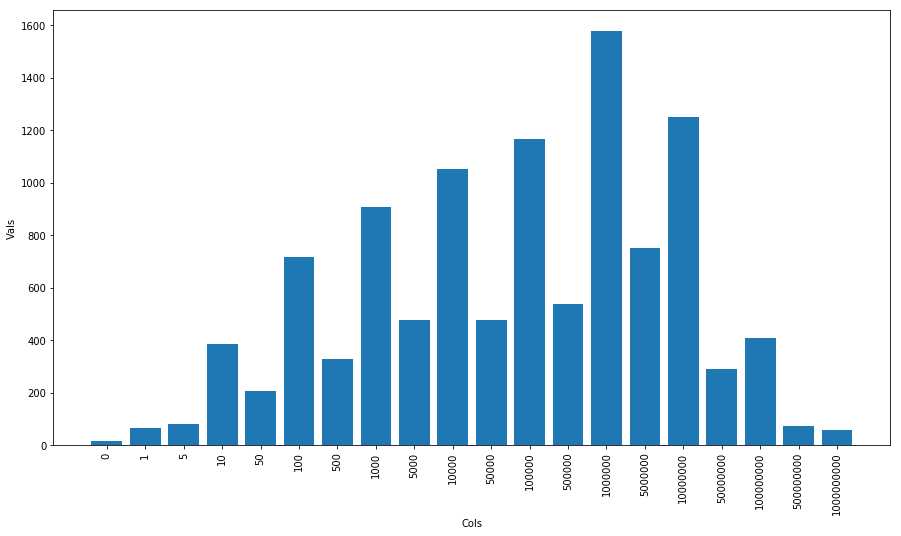

In [21]:
plot_two_cols(downloads_df, 'Cols', 'Vals', 15, 8)

As it can bee seena also from above graph most of applications have more then 1 mln downloads. Second ones are those which have 10 mln downloads

Lets analize `Price` column

In [22]:
df_new['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Need to convert it into numbers

Lest see `Genres`

In [23]:
df_new['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

I will later do one hot encoding for this one

In [24]:
df_new['Price']=df_new['Price'].str.replace('$','')
df_new['Price']=df_new['Price'].astype(float)

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Lets analize `Size` column

In [25]:
df_new['Size'].tail(10)

10831                  9.8M
10832                  582k
10833                  619k
10834                  2.6M
10835                  9.6M
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, dtype: object

So to convert all of them to normal number will convert all of them to megabytes, thats why will delete M and all those wich are with kilobytes, will devide that ones into 1000.   So as I see there are apps with M - Megabytes, K-kilobytes and 1000+ which is about 1M. So what I will do will convert all of them to Megabytes i.e will get rid of M, so numbers will become megabyte, will make + as K nad everything wich has K letter at the end will delete K and devide that numbers into 1000 so all of them will become Megabytes. Also there is cells with text `Varies with device` which I will fill with mean of the column

Need to convert them into normal numbers. 

In [26]:
df_new['Size']=df_new['Size'].str.replace('+', '')
df_new['Size']=df_new['Size'].str.replace('M', '')
df_new['Size']=df_new['Size'].str.replace(',', '')
df_new['Size']=df_new['Size'].replace('Varies with device', 0)

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [27]:
k_index=df_new[df_new['Size'].astype(str).str[-1]=='k'].index
for i in range(len(k_index)):
    df_new['Size'][k_index[i]]=float(df_new['Size'][k_index[i]][:-1])/1000
    

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df_new['Size']=df_new['Size'].astype(float)
df_new['Size']=df_new['Size'].replace(0, df_new['Size'].mean())

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now will investigate `Android Version` column

In [29]:
df_new['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [30]:
df_new['Android Ver']=df_new['Android Ver'].str.replace('and up', '')
df_new['Android Ver']=df_new['Android Ver'].str.replace(' ', '')
df_new['Android Ver']=df_new['Android Ver'].str.replace('W', '')
df_new['Android Ver']=df_new['Android Ver'].replace('Varieswithdevice', df_new['Android Ver'].mode())

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Will take only first 3 digits as an Android Version becouse mainly 4rd digit in and update of certain version

In [31]:
df_new['Android Ver']=df_new['Android Ver'].astype(str).str[:3]

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now it is finally time to see what is behind `Category` column

In [32]:
df_new['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

As I see the column looks good. Just when will fit into model to make prediction, will convert it into dummy variables

In [33]:
group_Cat=df_new.groupby('Category')['Installs'].sum()
group_Cat

Category
ART_AND_DESIGN         1.243381e+08
AUTO_AND_VEHICLES      5.313021e+07
BEAUTY                 2.719705e+07
BOOKS_AND_REFERENCE    1.921470e+09
BUSINESS               1.001915e+09
COMICS                 5.608615e+07
COMMUNICATION          3.264728e+10
DATING                 2.643108e+08
EDUCATION              8.714520e+08
ENTERTAINMENT          2.869160e+09
EVENTS                 1.597316e+07
FAMILY                 1.025826e+10
FINANCE                8.766487e+08
FOOD_AND_DRINK         2.738988e+08
GAME                   3.508602e+10
HEALTH_AND_FITNESS     1.583073e+09
HOUSE_AND_HOME         1.687125e+08
LIBRARIES_AND_DEMO     6.299591e+07
LIFESTYLE              5.376435e+08
MAPS_AND_NAVIGATION    7.242819e+08
MEDICAL                5.325744e+07
NEWS_AND_MAGAZINES     7.496318e+09
PARENTING              3.152111e+07
PERSONALIZATION        2.325495e+09
PHOTOGRAPHY            1.008825e+10
PRODUCTIVITY           1.417609e+10
SHOPPING               3.247849e+09
SOCIAL             

I want also to see what Categories are more popular, which ones have more downloads

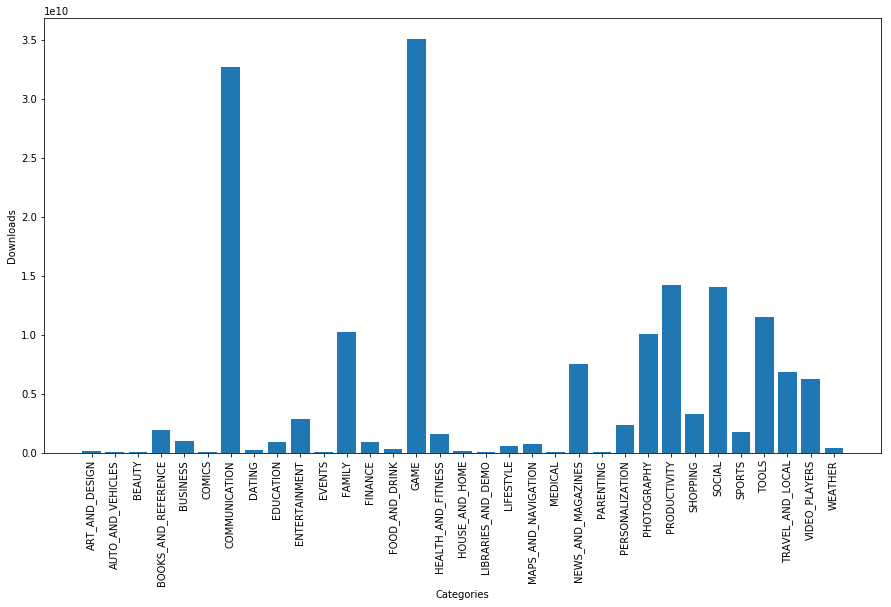

In [34]:
my_Categories=pd.DataFrame({'Categories':group_Cat.index, 'Downloads':group_Cat.values})
plot_two_cols(my_Categories, 'Categories', 'Downloads', 15, 8)

As it can clearly be seen from the graph, most popular apps are `Games` and after that `Communication`. All other are much more less.

Lets little bit more analyze these two kinde of apps.
<br>
Firs of all `Games`

In [35]:
df['Installs']=df_new['Installs']
game_Category=df[df['Category']=='GAME']
grouped_Category=game_Category.groupby('Genres')['Installs'].sum()

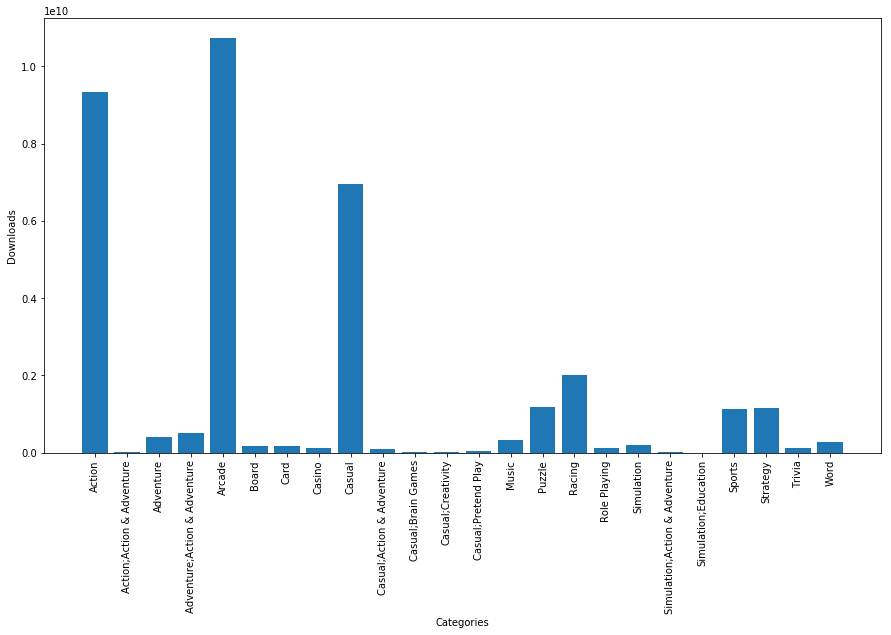

In [36]:
my_Games=pd.DataFrame({'Categories':grouped_Category.index, 'Downloads':grouped_Category.values})
plot_two_cols(my_Games, 'Categories', 'Downloads', 15, 8)

As it can be seen most popular Games are Arcade, then Action and Casual. All other have very small proportions.

Now will do the same for `Communication` column to see what is behind

In [37]:
comm_Category=df[df['Category']=='COMMUNICATION']
grouped_Communic=comm_Category.groupby('Genres')['Installs'].sum()
grouped_Communic

Genres
Communication    3.264728e+10
Name: Installs, dtype: float64

As it can be seen under `Genres` it is again Communication, so there is no more information for that one.

Also lets see whether there are any connection between colums. For that purpose I will use heatmap

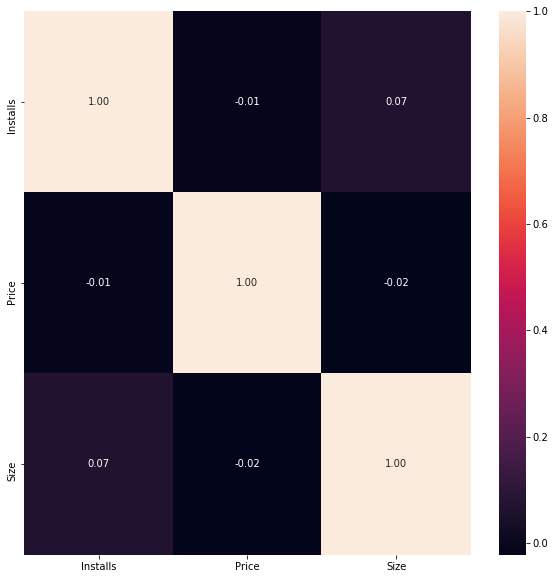

In [38]:
def create_heatmap(dataframe, size):
    '''
    INPUT
    
    dataframe - name of dataframe for which you need to create heatmap
    size - size of heatmap you want to see
    
    OUTPUT
    creates dataframe
    
    '''
    fig, ax = plt.subplots(figsize=(size,size))
    return sns.heatmap(dataframe.corr(), annot=True, fmt='.2f', ax=ax);

create_heatmap(df_new, 10)

I see that there is almost no connection between colums. The reason may be becouse some colums are just information about version, so they ar not like stocks which prices rises and go down based on condition of another stocks/bonds

In [39]:
# gm = pd.factorize(df_new['Category'])
# gm

Before puting my dataset into any model, I neet to convert them into numbers or do one hot encoding. So lets see which ones are numbers and which one not.

In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 6 columns):
Installs       10840 non-null int32
Category       10840 non-null object
Genres         10840 non-null object
Price          10840 non-null float64
Size           10840 non-null float64
Android Ver    10840 non-null object
dtypes: float64(2), int32(1), object(3)
memory usage: 870.5+ KB


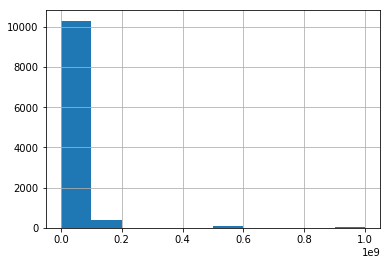

In [41]:
df_new['Installs'].hist()

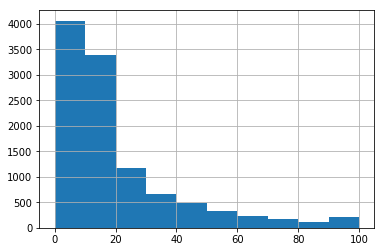

In [42]:
df_new['Size'].hist()

In [43]:
#doing one hot encoding in 1 row for Categories
categories=df_new['Category'].unique()
for i in range(len(categories)):
    df_new['Category']=df_new['Category'].replace(categories[i],i)

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
#doing one hot encoding in 1 row for Android Ver
andr_ver=df_new['Android Ver'].unique()
for i in range(len(andr_ver)):
    df_new['Android Ver']=df_new['Android Ver'].replace(andr_ver[i],i)

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
#doing one hot encoding in 1 row for Genres
app_gen=df_new['Genres'].unique()
for i in range(len(app_gen)):
    df_new['Genres']=df_new['Genres'].replace(app_gen[i],i)

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


So as we can see now all my column are numeric so can start fitting them into model

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 6 columns):
Installs       10840 non-null int32
Category       10840 non-null int64
Genres         10840 non-null int64
Price          10840 non-null float64
Size           10840 non-null float64
Android Ver    10840 non-null int64
dtypes: float64(2), int32(1), int64(3)
memory usage: 870.5 KB


WIll convert ranges of app size to some correct size not to negatively affect on prediction. Becouse it is less probable that we will have a lot of, for example 91 mb apps, so it is better to have it as 90 mb

In [47]:
df_new.loc[df_new.Size < 20, 'Size'] = 20
df_new.loc[(df_new.Size > 20) & (df_new.Size < 40), 'Size'] = 40
df_new.loc[(df_new.Size > 40) & (df_new.Size < 60), 'Size'] = 60
df_new.loc[(df_new.Size > 60) & (df_new.Size < 80), 'Size'] = 80
df_new.loc[(df_new.Size > 80) & (df_new.Size < 100), 'Size'] = 100

C:\Users\zakarars\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


For the same reason will do the same for prices

In [48]:
df_new.loc[df_new.Price < 20, 'Price'] = 20
df_new.loc[(df_new.Price > 20) & (df_new.Price < 40), 'Price'] = 40
df_new.loc[(df_new.Price > 40) & (df_new.Price < 60), 'Price'] = 60
df_new.loc[(df_new.Price > 60) & (df_new.Price < 80), 'Price'] = 80
df_new.loc[(df_new.Price > 80) & (df_new.Price < 100), 'Price'] = 100
df_new.loc[(df_new.Price > 100) & (df_new.Price < 200), 'Price'] = 200
df_new.loc[(df_new.Price > 200) & (df_new.Price < 300), 'Price'] = 300
df_new.loc[(df_new.Price > 300) & (df_new.Price < 400), 'Price'] = 400

Now I will use one of the Supervised learning techniques to predict application downloads based on df_new

In [49]:
X=df_new.iloc[:,1:]
y=df_new.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.001)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.15


In [51]:
print('Score on training ', round(model.score(X_train, y_train), 2))

Score on training  0.15
